In [5]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [7]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\Users\zwato\AppData\Local\Temp\ipykernel_11328\357239312.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
C:\Users\zwato\AppData\Local\Temp\ipykernel_11328\357239312.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [8]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


# Zad
Nauczmy prosty model.

In [9]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [11]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)

Epoch 1/100
943/943 [==============================] - 3s 2ms/step - loss: 0.4574 - accuracy: 0.7814 - val_loss: 0.3920 - val_accuracy: 0.8096
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3786 - accuracy: 0.8116 - val_loss: 0.3669 - val_accuracy: 0.8197
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3697 - accuracy: 0.8197 - val_loss: 0.3718 - val_accuracy: 0.8091
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3705 - accuracy: 0.8160 - val_loss: 0.3603 - val_accuracy: 0.8147
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3704 - accuracy: 0.8147 - val_loss: 0.3657 - val_accuracy: 0.8175
Epoch 6/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3691 - accuracy: 0.8136 - val_loss: 0.3907 - val_accuracy: 0.7964
Epoch 7/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3696 - accuracy: 0.8146 - val_loss: 0.3651 - val_accuracy: 0.8179

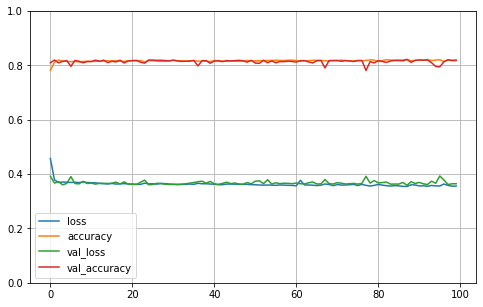

In [12]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 1ms/step - loss: 0.3644 - accuracy: 0.8178


[0.3644145131111145, 0.81779545545578]

In [21]:
y_pred = np.round(model.predict(X_test))
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [25]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= np.round(model.predict(X_test)) )

0.8177954847277557

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych z fróżnymi funkcjami aktywacji:
* sigmoid
* tanh
* relu
* elu
* LeakyReLU

In [27]:
from sklearn.preprocessing import StandardScaler

X_train_norm, y_train_norm = StandardScaler().fit_transform(X_train), y_train

sigmoid_history = History()
sigmod_model = Sequential([
    Dense(100, activation='sigmoid', input_shape=(X_train_norm.shape[1],)),
    Dense(50, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

tanh_history = History()
tanh_model = Sequential([
    Dense(100, activation='tanh', input_shape=(X_train_norm.shape[1],)),
    Dense(50, activation='tanh'),
    Dense(10, activation='tanh'),
    Dense(1, activation='sigmoid')
])

relu_history = History()
relu_model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train_norm.shape[1],)),
    Dense(50, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

elu_history = History()
elu_model = Sequential([
    Dense(100, activation='elu', input_shape=(X_train_norm.shape[1],)),
    Dense(50, activation='elu'),
    Dense(10, activation='elu'),
    Dense(1, activation='sigmoid')
])

leaky_relu_history = History()
leaky_relu_model = Sequential([
    Dense(100, activation='leaky_relu', input_shape=(X_train_norm.shape[1],)),
    Dense(50, activation='leaky_relu'),
    Dense(10, activation='leaky_relu'),
    Dense(1, activation='sigmoid')
])


In [30]:
for model in [sigmod_model, tanh_model, relu_model, elu_model, leaky_relu_model]:
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    model.fit(X_train_norm, y_train_norm, validation_data=(X_test, y_test), batch_size=32, epochs=10, callbacks=[history])
    model.evaluate(X_test, y_test)

Epoch 1/10
943/943 [==============================] - 3s 2ms/step - loss: 0.3160 - accuracy: 0.8507 - val_loss: 1.0503 - val_accuracy: 0.2681
Epoch 2/10
943/943 [==============================] - 2s 2ms/step - loss: 0.3149 - accuracy: 0.8518 - val_loss: 0.9542 - val_accuracy: 0.2898
Epoch 3/10
943/943 [==============================] - 2s 2ms/step - loss: 0.3141 - accuracy: 0.8548 - val_loss: 0.8382 - val_accuracy: 0.3635
Epoch 4/10
943/943 [==============================] - 2s 2ms/step - loss: 0.3126 - accuracy: 0.8521 - val_loss: 0.8768 - val_accuracy: 0.3610
Epoch 5/10
943/943 [==============================] - 2s 2ms/step - loss: 0.3112 - accuracy: 0.8543 - val_loss: 0.8854 - val_accuracy: 0.3744
Epoch 6/10
943/943 [==============================] - 2s 2ms/step - loss: 0.3104 - accuracy: 0.8544 - val_loss: 0.7520 - val_accuracy: 0.6039
Epoch 7/10
943/943 [==============================] - 3s 3ms/step - loss: 0.3092 - accuracy: 0.8557 - val_loss: 0.7555 - val_accuracy: 0.5682
Epoch 

# Zad. 
Stwórz wykres porównujący metody. 

In [34]:
for his in [sigmoid_history, tanh_history, relu_history, elu_history, leaky_relu_history]:
    pd.DataFrame(his.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

TypeError: no numeric data to plot